In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import json
import requests
import pickle

pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/NYCTaxi.csv").assign(
    log_trip_duration = lambda df: np.log(df.trip_duration),
    pickup_datetime = lambda df: df.pickup_datetime.apply(pd.to_datetime),
    dropoff_datetime = lambda df: df.dropoff_datetime.apply(pd.to_datetime),
    dist = lambda df: np.sqrt((df.pickup_latitude-df.dropoff_latitude)**2 + (df.pickup_longitude-df.dropoff_longitude)**2),
    #---#
    vendor_id = lambda df: df.vendor_id.map({1:'A',2:'B'})
).assign(
    speed = lambda df: df.dist / df.trip_duration,
    pickup_hour = lambda df: df.pickup_datetime.dt.hour,
    dropoff_hour = lambda df: df.dropoff_datetime.dt.hour,
    dayofweek = lambda df: df.pickup_datetime.dt.dayofweek
)

In [15]:
tidydata=df.pivot_table(
    index='pickup_hour',
    columns='dayofweek',
    values='speed',
    aggfunc='mean'
).stack().reset_index().rename({0:'평균속력'},axis=1)

In [16]:
fig = px.density_heatmap(
    data_frame=tidydata,
    x='pickup_hour',
    y='dayofweek',
    z='평균속력',
    nbinsx=24,
    nbinsy=7,
    height=300
)

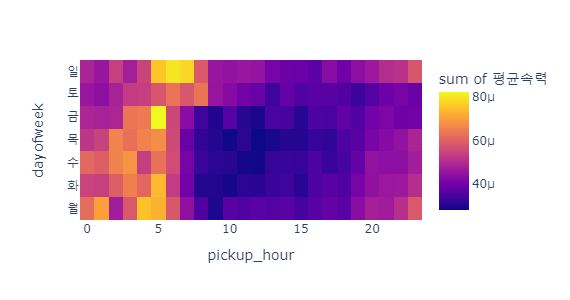

In [17]:
# y축 숫자를 한글로 변경
day_of_week_mapping = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
fig.update_yaxes(tickvals=list(day_of_week_mapping.keys()), ticktext=list(day_of_week_mapping.values()))

In [18]:
tidydata2=df.pivot_table(
    index='pickup_hour',
    columns='dayofweek',
    values='dist',
    aggfunc='mean'
).stack().reset_index().rename({0:'평균이동거리'},axis=1)

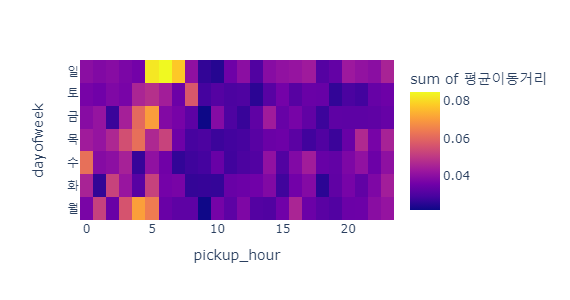

In [19]:
fig2=px.density_heatmap(
    data_frame=tidydata2,
    x='pickup_hour',
    y='dayofweek',
    z='평균이동거리',
    nbinsx=24,
    nbinsy=7,
    height=300
)


# y축 숫자를 한글로 변경
day_of_week_mapping = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
fig2.update_yaxes(tickvals=list(day_of_week_mapping.keys()), ticktext=list(day_of_week_mapping.values()))